In [1]:
import pandas as pd
import numpy as np

In [2]:
import pymongo
from pymongo import MongoClient
client = MongoClient()
client = MongoClient('localhost', 27017)

In [3]:
data = pd.read_excel('railData.xls')

In [4]:
data = data.dropna()
data.head()

,Train No,Train Name,SEQ,Station Code,Station Name,Arrival time,Arrival Seconds,Departure Time,Departure Seconds,Distance,Source Station,Source Station Name,Destination Station,Destination Station Name
0,107,SWV-MAO-VLNK,1,SWV,SAWANTWADI R,00:00:00,0.0,10:25:00,5100.0,0.0,SWV,SAWANTWADI ROAD,MAO,MADGOAN JN.
1,107,SWV-MAO-VLNK,2,THVM,THIVIM,11:06:00,1020.0,11:08:00,4440.0,32.0,SWV,SAWANTWADI ROAD,MAO,MADGOAN JN.
2,107,SWV-MAO-VLNK,3,KRMI,KARMALI,11:28:00,5640.0,11:30:00,5760.0,49.0,SWV,SAWANTWADI ROAD,MAO,MADGOAN JN.
3,107,SWV-MAO-VLNK,4,MAO,MADGOAN JN.,12:10:00,4920.0,00:00:00,0.0,78.0,SWV,SAWANTWADI ROAD,MAO,MADGOAN JN.
4,108,VLNK-MAO-SWV,1,MAO,MADGOAN JN.,00:00:00,0.0,20:30:00,9000.0,0.0,MAO,MADGOAN JN.,SWV,SAWANTWADI ROAD


In [6]:
stations = data['Source Station Name'].unique()

In [7]:
trains = data[['Train No','Train Name']].drop_duplicates()
trains.reset_index(inplace = True)

In [8]:
x = data.drop(['Train No','Train Name','SEQ','Arrival time','Departure Time','Station Name','Station Code','Source Station','Source Station Name','Destination Station','Destination Station Name'],axis=1)
x.head()

,Arrival Seconds,Departure Seconds,Distance
0,0.0,5100.0,0.0
1,1020.0,4440.0,32.0
2,5640.0,5760.0,49.0
3,4920.0,0.0,78.0
4,0.0,9000.0,0.0


In [9]:
y = data['Departure Seconds']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)
X_train.head()

,Arrival Seconds,Departure Seconds,Distance
22727,4800.0,4920.0,797.0
55847,4440.0,1800.0,2279.0
52346,6420.0,6540.0,854.0
11302,4620.0,5220.0,518.0
14015,2880.0,2880.0,2423.0


In [46]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45873 entries, 18004 to 41894
Data columns (total 3 columns):
Arrival Seconds      45873 non-null float64
Departure Seconds    45873 non-null float64
Distance             45873 non-null float64
dtypes: float64(3)
memory usage: 1.4 MB


In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

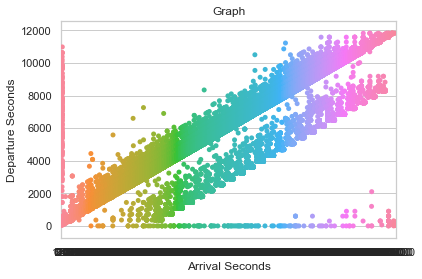

In [12]:
import matplotlib.pyplot as plt 
import seaborn as sns 

sns.set(style ="whitegrid") 
ax = sns.stripplot(x = 'Arrival Seconds', y = 'Departure Seconds', data = X_train);
plt.title('Graph') 
plt.show() 

In [25]:
y_test.head()

21363    3840.0
19423    8280.0
18967    2820.0
52425    4020.0
54573    6360.0
Name: Departure Seconds, dtype: float64

In [24]:
test = [[1020.0,4440.0,2279.0]]
pred = knn.predict(test)
pred

array([4080.])

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(pred, y_test)

0.8086978636826043

In [20]:
import pickle 
filename = 'finalized_model.sav'
pickle.dump(knn, open(filename, 'wb'))

'''
# Load the pickled model 
knn_from_pickle = pickle.loads(saved_model) 

# Use the loaded pickled model to make predictions 
knn_from_pickle.predict(X_test) 
'''


'\n# Load the pickled model \nknn_from_pickle = pickle.loads(saved_model) \n\n# Use the loaded pickled model to make predictions \nknn_from_pickle.predict(X_test) \n'